In [3]:
# Data exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


# Load the TSV file into a DataFrame

df = pd.read_csv("data\MovieSummaries\movie.metadata.tsv", sep='\t')

df.columns = ['Wikipedia movie ID','Freebase movie ID','Movie name','Movie release date','Movie box office revenue','Movie runtime','Movie languages','Movie countries','Movie genres']


In [4]:
df.size


735660

In [5]:
df['Movie release date'] = pd.to_datetime(df['Movie release date'], errors='coerce')
df = df.dropna(subset=['Movie release date'])
df['Movie release date'] = df['Movie release date'].dt.year


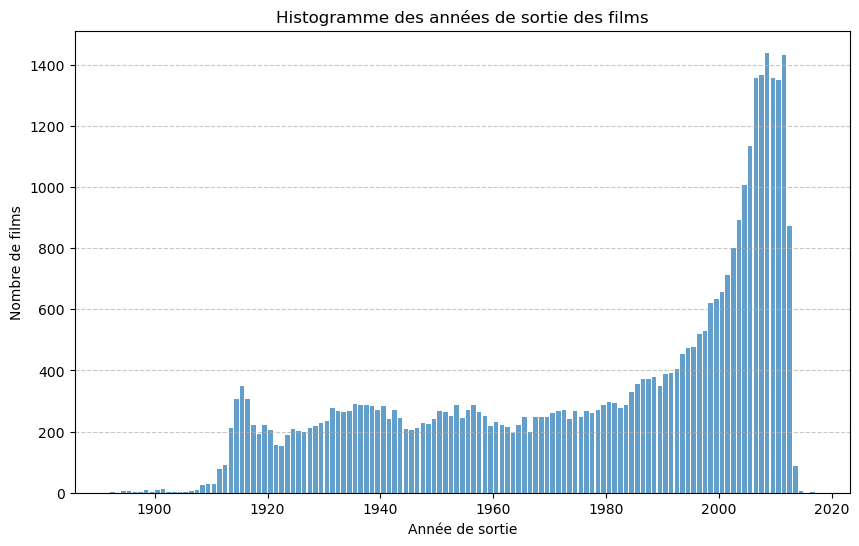

In [6]:
# Créez un histogramme
plt.figure(figsize=(10, 6))
plt.hist(df['Movie release date'], bins=range(min(df['Movie release date']), max(df['Movie release date']) + 2), rwidth=0.8, alpha=0.7)
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Histogramme des années de sortie des films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
df.size

354339

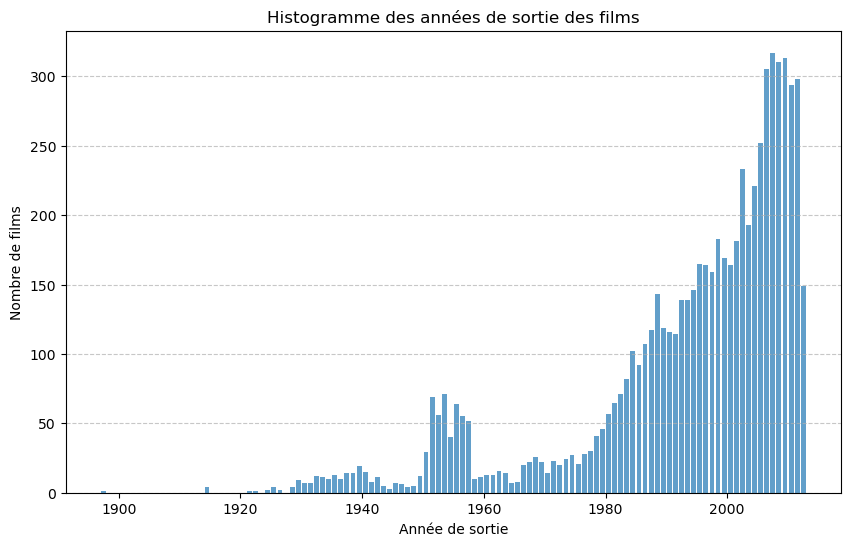

In [8]:
df = df.dropna(subset=['Movie box office revenue'])
# Créez un histogramme
plt.figure(figsize=(10, 6))
plt.hist(df['Movie release date'], bins=range(min(df['Movie release date']), max(df['Movie release date']) + 2), rwidth=0.8, alpha=0.7)
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Histogramme des années de sortie des films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
df.size

61128

In [11]:
from ast import literal_eval 

tsv_file_path = "data\KaggleMovies\movies_metadata.csv"
kg = pd.read_csv(tsv_file_path)

kg['genres'] = kg['genres'].apply(literal_eval)
kg = kg.dropna(subset=['release_date'])
kg["release_date"] = pd.to_datetime(kg["release_date"],errors="coerce")

kg['release_date'] = kg['release_date'].dt.year

C:\Users\rchiu\AppData\Local\Temp\ipykernel_3628\2912047387.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  kg = pd.read_csv(tsv_file_path)


In [12]:
kg.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
kg.genres

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45460    [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45379, dtype: object

In [14]:
kg["release_date"].describe()

count    45376.000000
mean      1991.881193
std         24.055360
min       1874.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: release_date, dtype: float64

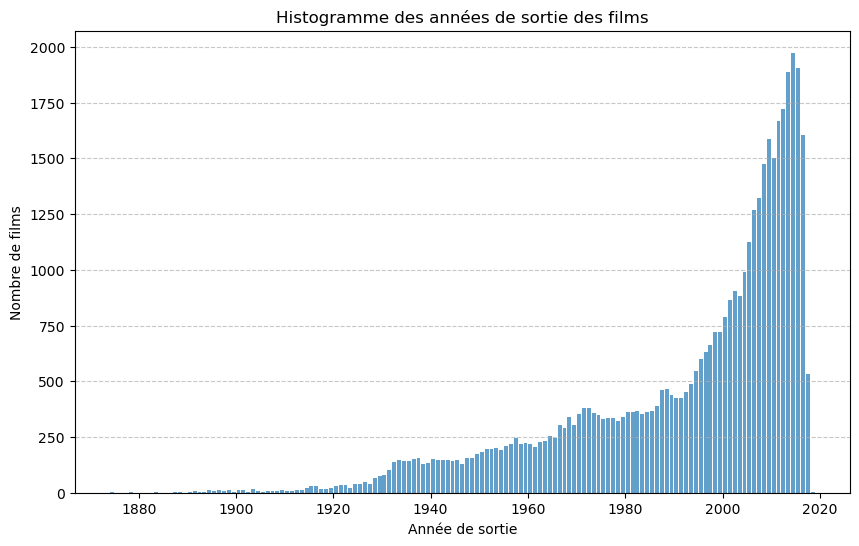

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(kg['release_date'], bins=range(1874, 2020), rwidth=0.8, alpha=0.7)
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Histogramme des années de sortie des films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

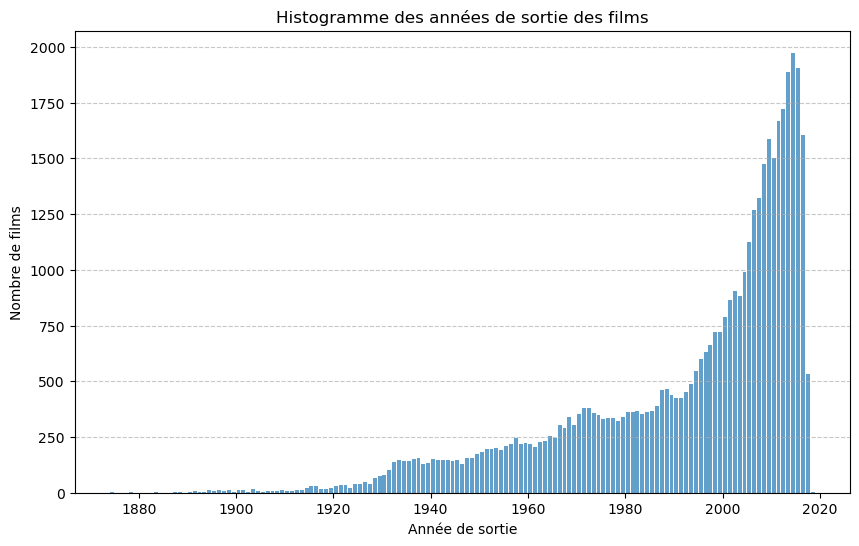

In [16]:
kg.dropna(subset="revenue")
plt.figure(figsize=(10, 6))
plt.hist(kg['release_date'], bins=range(1874, 2020), rwidth=0.8, alpha=0.7)
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title('Histogramme des années de sortie des films')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
kg.genres

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45460    [{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45379, dtype: object

In [18]:
import ast
import numpy as np
genres_lists = []
for dics in kg.genres:
    genres_list = []
    for dic in ast.literal_eval(dics):
        genre = dic["name"]
        genres_list.append(genre)
    genres_lists.append(genres_list)

print(genres_lists)


ValueError: malformed node or string: [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]

In [ ]:
kg["genres_list"] = genres_lists

In [ ]:

total_genres = {x for l in genres_lists for x in l}
print(total_genres)

{'Family', 'BROSTA TV', 'Music', 'The Cartel', 'Crime', 'Science Fiction', 'Fantasy', 'Animation', 'Rogue State', 'Pulser Productions', 'Action', 'Mardock Scramble Production Committee', 'Odyssey Media', 'War', 'Telescene Film Group Productions', 'History', 'Carousel Productions', 'GoHands', 'Romance', 'Drama', 'Western', 'Aniplex', 'Horror', 'Sentai Filmworks', 'Documentary', 'Adventure', 'Mystery', 'TV Movie', 'Comedy', 'Thriller', 'Vision View Entertainment', 'Foreign'}


[Drama              275
Comedy             171
Action             121
Thriller           111
Romance            100
Crime               64
Science Fiction     61
Family              59
Adventure           54
Horror              48
Fantasy             38
Documentary         34
Animation           28
Mystery             23
History             18
War                 13
Foreign             13
TV Movie            12
Western             11
Music                7
Name: count, dtype: int64, Drama              327
Comedy             219
Romance            120
Thriller           120
Action              93
Crime               56
Science Fiction     55
Family              49
Adventure           47
Horror              40
Fantasy             34
Mystery             27
Foreign             26
Documentary         25
Animation           22
TV Movie            22
History             17
Music               15
War                 13
Western              5
Name: count, dtype: int64, Drama              235
Co

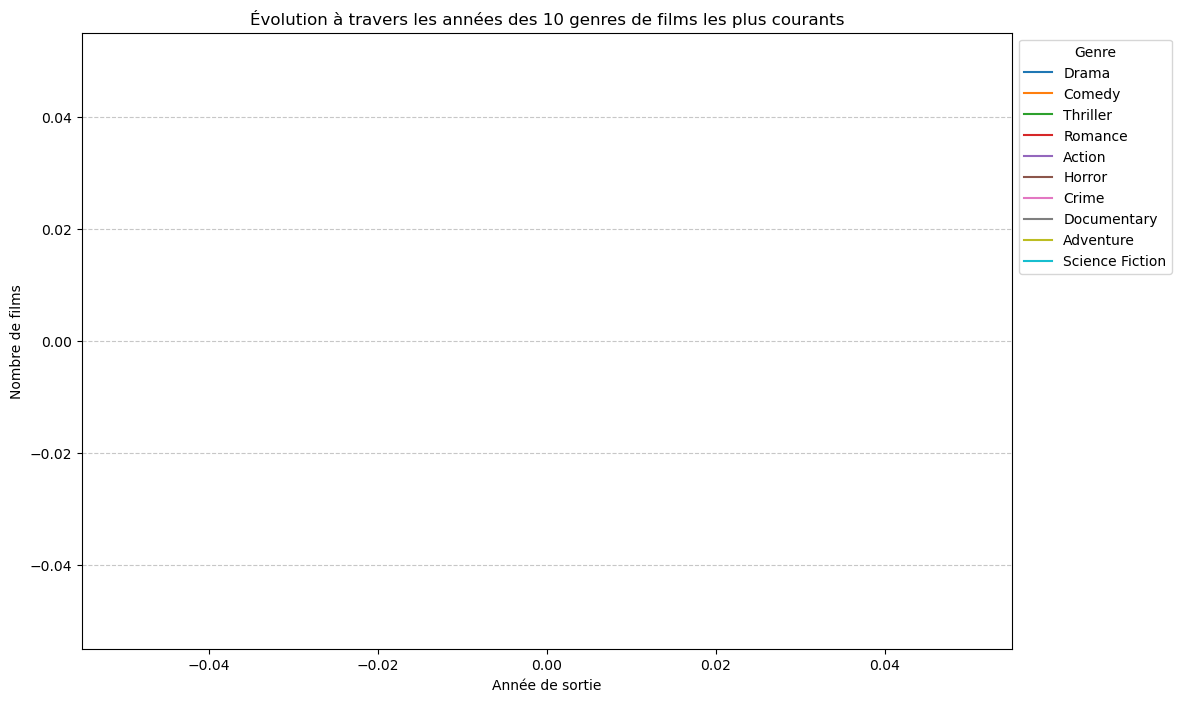

In [22]:




# Comptez le nombre de films par genre
counts_per_year =[]
for year in kg["release_date"].unique():
    kg_year = kg[kg["release_date"] == year]
    genre_counts = kg_year['genres'].apply(lambda x: [n['name'] for n in x]).sum()
    genre_counts = pd.Series(genre_counts).value_counts()
    counts_per_year.append(genre_counts)
print(counts_per_year)
# Sélectionnez les 10 genres les plus courants
global_counts = kg['genres'].apply(lambda x: pd.Series([i['name'] for i in x]))\
.stack().value_counts() 
top_10_genres = global_counts.head(10).index
print(top_10_genres)
print(counts_per_year)
# Créez un graphique avec une courbe par genre parmi les 10 genres les plus courants
plt.figure(figsize=(12, 8))

for genre in top_10_genres:
    kg_genre = kg[kg['genres'] == genre]
    genre_counts = kg_genre.groupby(kg_genre['release_date']).size()
    plt.plot(genre_counts.index, genre_counts.values, label=genre)

plt.xlabel('Année de sortie')
plt.ylabel('Nombre de films')
plt.title("Évolution à travers les années des 10 genres de films les plus courants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()